In [147]:
import cv2
import os
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import numpy as np

In [142]:
list_dir[0]

'2'

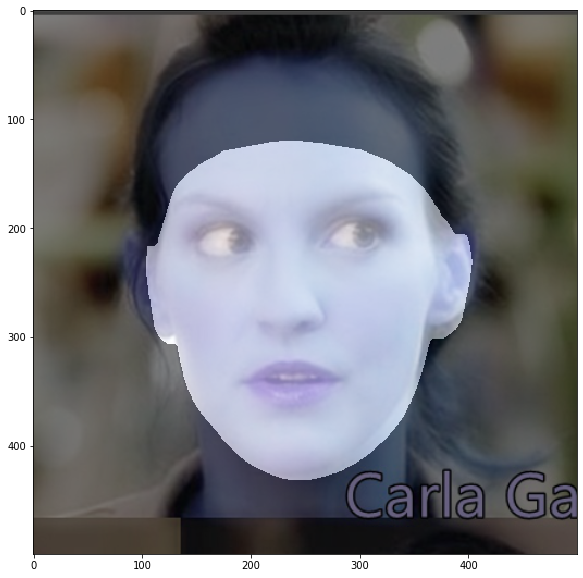

In [158]:
path='/home/thaontp79/Documents/project/pytorch-CycleGAN-and-pix2pix/datasets/datasets/Mask512'
list_dir=os.listdir(path)
list_im=os.listdir(os.path.join(path,list_dir[0]))
ori_path='/home/thaontp79/Documents/project/pytorch-CycleGAN-and-pix2pix/datasets/datasets/trainA'
ori_im=os.path.join(ori_path, list_dir[0], list_im[11])
im_path=os.path.join(path, list_dir[0], list_im[11])
im=cv2.imread(im_path)
im = im[6:-6, 6:-6]
ori_im=cv2.imread(ori_im)
plt.figure(figsize=(10, 10))
#plt.imshow(np.concatenate([ori_im, im], axis=1))
plt.imshow(ori_im)
plt.imshow(im, alpha=0.5)

In [159]:
path = '/home/thaontp79/Documents/project/pytorch-CycleGAN-and-pix2pix/datasets/datasets/Mask512'
ori_path = '/home/thaontp79/Documents/project/pytorch-CycleGAN-and-pix2pix/datasets/datasets/trainA'
dest = '/home/thaontp79/Documents/project/pytorch-CycleGAN-and-pix2pix/datasets/mask/train'

list_dir=os.listdir(path)
count_error=0
total_files=0
for fold in tqdm(list_dir):
    list_im=os.listdir(os.path.join(path, fold))
    for i in list_im:
        total_files+=1
        im_path=os.path.join(path, fold, i)
        im=cv2.imread(im_path)
        ori_im_path=os.path.join(ori_path, fold, i)
        ori_im=cv2.imread(ori_im_path)
        
        if im.shape != (512, 512, 3):
            print(im.shape, im_path)
            #print('Error shape: ', im_path)
            count_error+=1
        elif os.path.isfile(ori_im_path) == False:
            #print('Original file not found: ', im_path)
            count_error+=1
            pass
        else:
            im=im[6:-6, 6:-6, :]
            cv2.imwrite(os.path.join(dest, fold + '_' + i), np.concatenate([ori_im, im], axis=1))
print(count_error)
print(total_files)

142
5436


In [145]:
dest, fold, i

('/home/thaontp79/Documents/project/pytorch-CycleGAN-and-pix2pix/datasets/datasets/total_train',
 '22',
 'Scarlett_Pomers_Ox865.png')

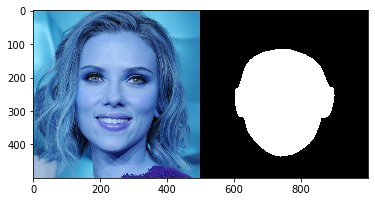

In [160]:
image=cv2.imread(os.path.join(dest, fold + '_' + i))
plt.imshow(image)